In [28]:
import duckdb
from widetable.cjt import CJT
from widetable.joingraph import JoinGraph
from widetable.semiring import AvgSemiRing
from widetable.aggregator import Annotation
from widetable.dashboard import DashBoard
from widetable.scope import *
from widetable.executor import *
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib import pyplot as plt

In [6]:
duck_db_conn = duckdb.connect(database=':memory:')
join_graph = JoinGraph(DuckdbExecutor(duck_db_conn, debug=False))
dashboard = DashBoard(join_graph)
dashboard.add_relation('ACCOUNT', relation_address='../data/salesforce/ACCOUNT.csv')
dashboard.add_relation('CAMPAIGN', relation_address='../data/salesforce/CAMPAIGN.csv')
dashboard.add_relation('OPPORTUNITY', relation_address='../data/salesforce/OPPORTUNITY.csv')
dashboard.add_relation('USERS', relation_address='../data/salesforce/USER.csv')
dashboard.add_relation('USER_ROLE', relation_address='../data/salesforce/USER_ROLE.csv')
dashboard.add_join('USERS', 'ACCOUNT', ['Account Id'], ['Id']);
dashboard.add_join('USERS', 'OPPORTUNITY', ['Id'], ['Owner Id']);
dashboard.add_join('USERS', 'USER_ROLE', ['User Role Id'], ['Id']);
dashboard.add_join('CAMPAIGN', 'OPPORTUNITY', ['Id'], ['Campaign Id']);

In [9]:
# define the measurement and 
measurement1 = dashboard.register_measurement("sum",'OPPORTUNITY','"Amount"', scope=FullJoin())
dashboard.absorption(measurement1, mode=5)

-- lift ACCOUNT 
-- lift CAMPAIGN 
-- lift OPPORTUNITY 
-- lift USERS 
-- lift USER_ROLE 
--Sending Message from CAMPAIGN to OPPORTUNITY m_type is Message.FULL
--Sending Message from ACCOUNT to USERS m_type is Message.FULL
--Sending Message from USER_ROLE to USERS m_type is Message.FULL
--Sending Message from USERS to OPPORTUNITY m_type is Message.FULL


,s
0,3.542538e+09


In [31]:
def total(title):
    cjt = dashboard.get_cjt(measurement1).copy()
    cjt.add_annotations('USERS', ['Title', Annotation.NOT_DISTINCT, title])
    user_table="USERS"
    cjt.upward_message_passing(cjt.get_relation_from_user_table(user_table))
    return cjt.absorption(mode=5, user_table=user_table)

interact(total, title=['Regional Sales Manager', 'Inside Sales', 'Sale Director']);

interactive(children=(Dropdown(description='title', options=('Regional Sales Manager', 'Inside Sales', 'Sale D…

<AxesSubplot:ylabel='s'>

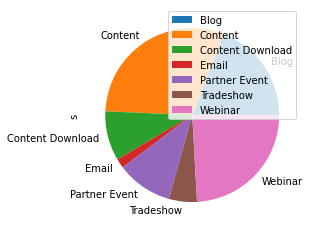

In [45]:
dashboard.add_groupbys(measurement1,'CAMPAIGN', ['Ctype'])
dashboard.absorption(measurement1,['Ctype'], mode=5, user_table ='CAMPAIGN').groupby('Ctype').mean().plot.pie(y="s")

In [93]:
def pie(name):
    cjt = dashboard.get_cjt(measurement1).copy()
    cjt.add_annotations('ACCOUNT', ['"Billing State"', Annotation.NOT_DISTINCT, name])
    user_table="ACCOUNT"
    cjt.upward_message_passing(cjt.get_relation_from_user_table(user_table))
    cjt.absorption(group_by=['Ctype'], mode=5, user_table=user_table).groupby('Ctype').mean().plot.pie(y="s")
    plt.show()

interact(pie, name=['Colorado', 'Illinois', 'Indiana', 'New York',
       'District of Columbia', 'Ohio', 'California', 'Kentucky',
       'Missouri', 'Florida', 'Pennsylvania', 'Connecticut', 'Minnesota',
       'Idaho', 'Texas', 'Tennessee', 'New Mexico', 'Oregon', 'Utah',
       'Mississippi', 'Louisiana', 'Nevada', 'West Virginia', 'Virginia',
       'Georgia', 'North Carolina', 'Arkansas', 'Michigan', 'Maryland',
       'South Carolina', 'Massachusetts', 'Iowa', 'Washington',
       'New Jersey', 'Oklahoma', 'Kansas', 'Arizona', 'Wisconsin',
       'Nebraska', 'Delaware', 'Montana', 'South Dakota', 'Alabama',
       'Maine', 'Hawaii', 'Rhode Island', 'Vermont', 'Alaska', 'Wyoming',
       'North Dakota', 'New Hampshire']);

interactive(children=(Dropdown(description='name', options=('Colorado', 'Illinois', 'Indiana', 'New York', 'Di…